In [40]:
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
from torchvision import utils, transforms, models
import numpy as np
import json
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [41]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

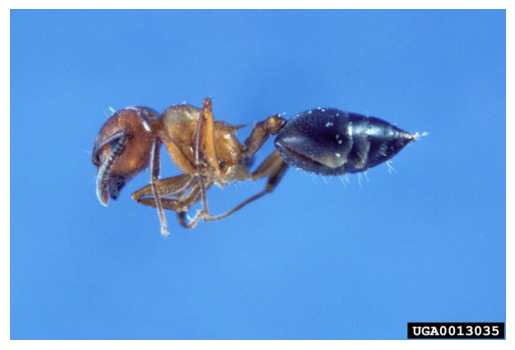

In [42]:
# View the original image
image = Image.open('./hymenoptera_data/train/ants/0013035.jpg')
plt.axis('off')
plt.imshow(image)

In [43]:
# Load pre trained vgg16 model

vgg = models.vgg16(pretrained=True)

/nfs/site/home/abalusan/work_dir_1/courses/.course_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/nfs/site/home/abalusan/work_dir_1/courses/.course_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [44]:
# Transform the image to become consumable by the vgg16 NN
image = transform(image)
print(image.shape)

torch.Size([3, 224, 224])


In [45]:
# We need to add batch size dimension. Add dimension at location 0.
image = image.unsqueeze(0)
print(image.shape)

torch.Size([1, 3, 224, 224])


In [46]:
output = vgg(image)
print(output.shape)

torch.Size([1, 1000])


In [47]:
# Squeeze 2D tensor to 1D
output = output.squeeze(0)
print(output.shape)

torch.Size([1000])


In [48]:
labels = json.load(open('imagenet_class_index.json'))

In [49]:
_, index = torch.max(output, 0)
print(index)
index = str(index.item()) # key of the labels from json is a string.
label = labels[index][1]
print(label)

tensor(310)
ant


In [50]:
module_list = list(vgg.features.modules()) # this is a generator. So we turn it into a list. 
#print(vgg.features)
print(module_list[0]) # prints all layers
print(module_list[1])
print(module_list[3])

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [51]:
outputs = []
names = []

# Element module_list[0] is the entire list of modules in vgg.features
for layer in module_list[1:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))

In [52]:
for feat_map in outputs:
    print(feat_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [53]:
processed = []

for feat_map in outputs:
    feat_map = feat_map.squeeze(0) # get rid of batch size dimension
    # Convert 3D Tensor to 2D. Sum same element in every channel. 
    gray_scale = torch.sum(feat_map, 0)
    gray_scale = gray_scale/feat_map.shape[0]
    processed.append(gray_scale.data.numpy())

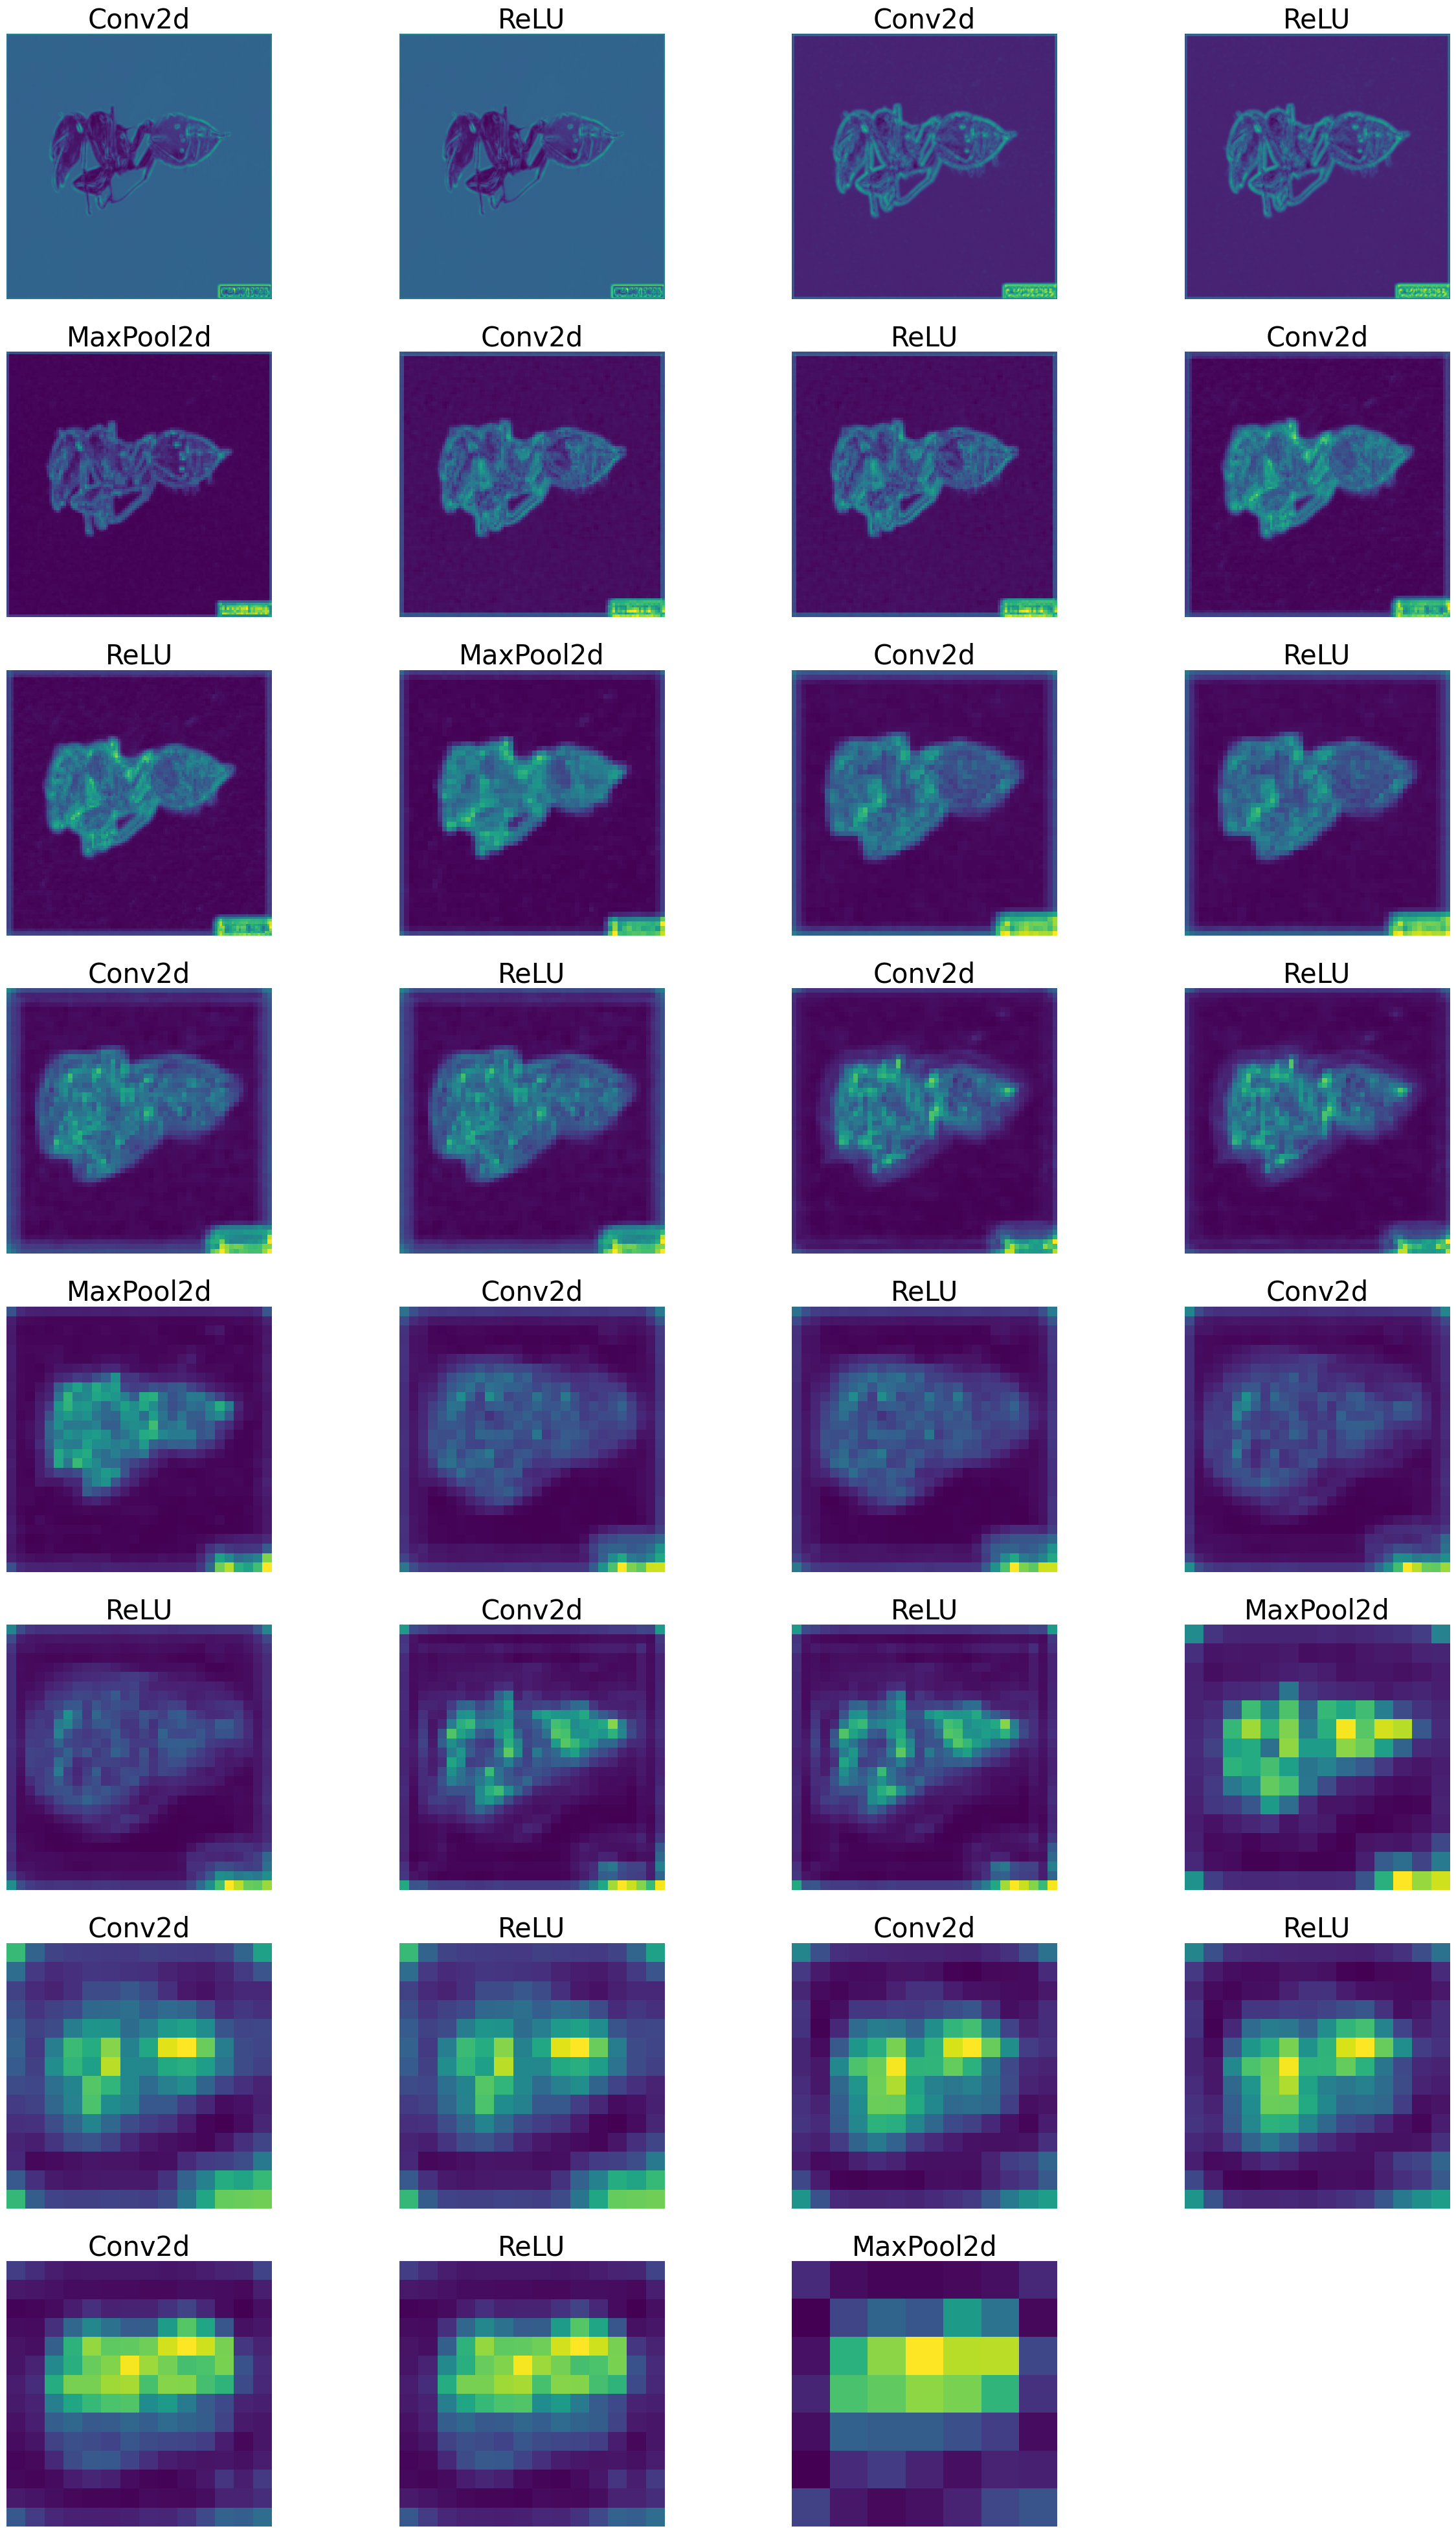

In [56]:
fig = plt.figure(figsize=(30,50))

for i in range(len(processed)):
    a = fig.add_subplot(8,4,i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    a.set_title(names[i].split('(')[0], fontsize=30)
